### Load necessary librariesData source: https://www.kaggle.com/competitions/job-salary-prediction

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiajue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jiajue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jiajue/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jiajue/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('/Users/jiajue/Documents/McGill/Winter Term/INSY669/Assignments/Train_rev1.csv')

# Brief look at data
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


### Pre-processing

In [4]:
# Descriptive stats of numerical data
df.describe()

# Create category for salary
high_sal = df['SalaryNormalized'].quantile(0.75)
df['Salary_Category'] = np.where(df['SalaryNormalized'] >= high_sal, 1, 0)

# Retain relevant columns
df = df[['FullDescription', 'Salary_Category']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FullDescription  244768 non-null  object
 1   Salary_Category  244768 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


### TFIDF Vectoriser & train test split

In [5]:
# Sample 2500 data for training
sample = df.sample(n=2500, random_state=5).reset_index(drop=True)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Initiate TFIDF vectoriser
vectorizer = TfidfVectorizer()

# Function to clean data
def process_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation
    tokens = word_tokenize(text)  # Tokenization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # lemmatise and remove stopwords
    return ' '.join(tokens) # join the words back into a single string

sample['cleaned_jd'] = sample['FullDescription'].astype(str).apply(process_text)

# Set up variables
X = sample['cleaned_jd']
y = sample['Salary_Category']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, shuffle=True)

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

### Naive Bayes Classifier

In [39]:
# Initialize and train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.732
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       366
           1       0.00      0.00      0.00       134

    accuracy                           0.73       500
   macro avg       0.37      0.50      0.42       500
weighted avg       0.54      0.73      0.62       500



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### NB parameter tuning

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Accuracy of tuned MNB: 0.778
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       366
           1       0.68      0.33      0.44       134

    accuracy                           0.78       500
   macro avg       0.74      0.64      0.65       500
weighted avg       0.76      0.78      0.75       500



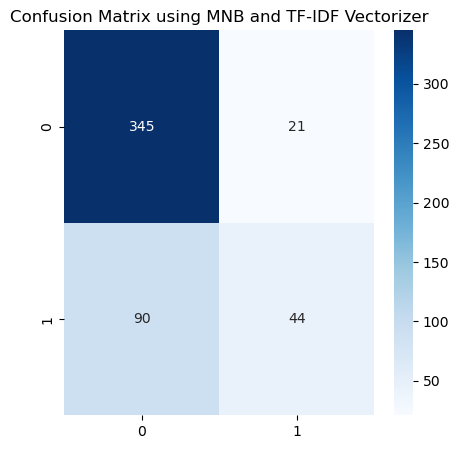

In [47]:
# Initialize the MNB model
mnb = MultinomialNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # regularisation
    'fit_prior': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)
mnb_best = grid_search.best_estimator_
y_pred = mnb_best.predict(X_test_tfidf)

# Evaluate the best model on the test set
print("Accuracy of tuned MNB:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix using MNB and TF-IDF Vectorizer")
plt.show()

### Support Vector Machine

In [45]:
# Initialize and train SVM classifier
svm = SVC(kernel='linear')  
svm.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.794
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       366
           1       0.66      0.48      0.55       134

    accuracy                           0.79       500
   macro avg       0.74      0.69      0.71       500
weighted avg       0.78      0.79      0.78       500



#### SVM Hyperparameter tuning

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'C': 1, 'kernel': 'linear'}
Accuracy: 0.794
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       366
           1       0.66      0.48      0.55       134

    accuracy                           0.79       500
   macro avg       0.74      0.69      0.71       500
weighted avg       0.78      0.79      0.78       500



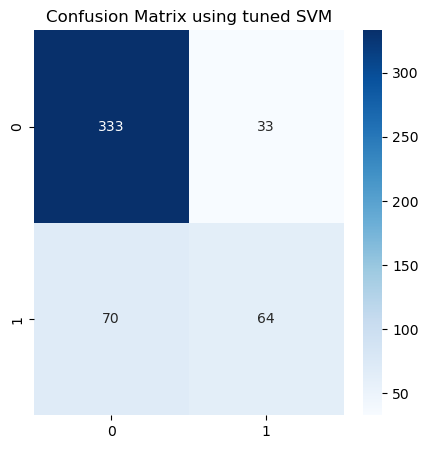

In [15]:
# Set up the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100],  # Regularization 
    'kernel': ['linear']  # Kernel
}

# Initialize the SVM model
svm = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_svm = grid_search.best_estimator_

# Predictions with the best model
y_pred_svm = best_svm.predict(X_test_tfidf)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix using tuned SVM")
plt.show()

### KNN Classifier

In [34]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) 

# Train the KNN classifier
knn.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = knn.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       366
           1       0.54      0.45      0.49       134

    accuracy                           0.75       500
   macro avg       0.68      0.65      0.66       500
weighted avg       0.74      0.75      0.74       500



### KNN parameter tuning

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'cosine', 'leaf_size': 10, 'algorithm': 'brute'}
Accuracy: 0.766
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       366
           1       0.58      0.46      0.51       134

    accuracy                           0.77       500
   macro avg       0.70      0.67      0.68       500
weighted avg       0.75      0.77      0.76       500



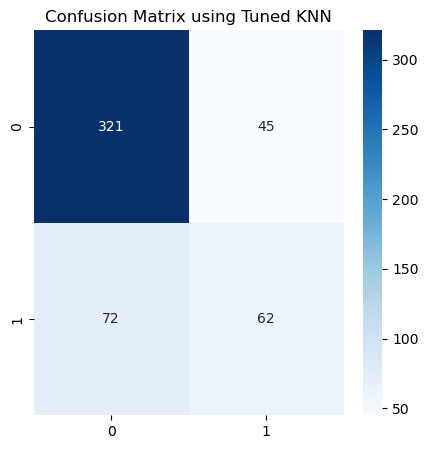

In [36]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

# Set up the search with KNN classifier
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_grid, n_iter=30, cv=5, n_jobs=-1, verbose=1)

# Fit search
random_search.fit(X_train_tfidf, y_train)

# Get the best parameters and model
print("Best Parameters:", random_search.best_params_)
knn_best = random_search.best_estimator_

# Predict using the best model
y_pred_best = knn_best.predict(X_test_tfidf)

# Evaluate the best model
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix using Tuned KNN")
plt.show()

### Extracting words that are indicative of salary range

In [46]:
# Get log probabilities for both classes
log_probs = clf.feature_log_prob_

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Store feature names and log probabilities
feature_prob = pd.DataFrame({
    'high': log_probs[1],
    'low': log_probs[0]
}, index=feature_names)

# Calculate the difference between log probabilities for high and low salary
feature_prob['diff'] = feature_prob['high'] - feature_prob['low']

# Sort the features by the difference in log probabilities (descending)
feature_prob = feature_prob.sort_values('diff', ascending=False)

# Get the top 10 words for high salary and low salary
top_high_salary_words = feature_prob.head(10)
top_low_salary_words = feature_prob.tail(10)

print("\nTop 10 features for high salary:")
print(top_high_salary_words)

print("\nTop 10 features for low salary:")
print(top_low_salary_words)


Top 10 features for high salary:
               high        low      diff
trading   -8.268076  -9.510101  1.242025
presales  -8.813657 -10.020053  1.206396
cima      -8.834716 -10.002416  1.167699
architect -8.611378  -9.741839  1.130461
scom      -9.170425 -10.236047  1.065622
fico      -9.173423 -10.236047  1.062624
lync      -9.174572 -10.236047  1.061475
plsql     -9.176344 -10.236047  1.059703
locum     -8.681662  -9.729107  1.047445
offshore  -8.723083  -9.751888  1.028805

Top 10 features for low salary:
                high       low      diff
teaching   -9.381580 -7.810360 -1.571219
technician -9.705751 -8.080875 -1.624877
vehicle    -9.639806 -8.005423 -1.634382
pm         -9.473857 -7.812597 -1.661260
hour       -8.754721 -7.086164 -1.668556
hotel      -9.733265 -7.959664 -1.773601
graduate   -9.422278 -7.473207 -1.949071
assistant  -9.756697 -7.532365 -2.224332
school     -9.560299 -7.286847 -2.273452
teacher    -9.868790 -7.403753 -2.465037


After testing and tuning 3 models - Multinomial Naives Bayes, SVM and KNN, the best performing one was that of **SVM**. Interestingly, there was no difference in performance between the base model and the tuned model. 

That said, it must be acknowledged that the number of hyperparameters tuned for SVM are rather limited, as the linear kernel is typically well-suited for text data like this scenario. Thus, the only parameter that was tuned was alpha. The SVM model was chosen for following reasons (refer to confusion matrix above):
1. Highest accuracy (0.794)
2. Best balance of recall and precision for jobs with high salary range

In terms of improvement to performance, it is worthy to note that Naives Bayes saw the greatest leap from parameter tuning -- accuracy improved by 4.6%, and the recall and precision scores for high salary range markedly improved from 0. 

In terms of the words that are most indicative of high and low salaries, the words with the greatest difference in probabilities for each class were extracted rather than simply looking at the words that had the highest probability of appearing in each class. This is to ensure that the words identified had the highest contrast between the salary categories, and to avoid scenario with overlaps between the 2 categories. 

Thus, words indicative of high salary: trading, presales, cima, architect, scom, fico, lync, plsql, locum, offshore. These words are indicative of roles in the finance industry, or in professional roles that require more specific skillsets, contributing to overall higher salaries.

Words indicative of low salary: teaching, technician, vehicle, pm, hour, hotel, graduate, assistant, school, teacher. These words on the other hand, is strongly suggestive that the education sector and the service industries are not as highly paied as the finance industry, which aligns with societal standards, considering that the finance industry is 'high risk high reward'. Words like hour, and graduate point to entry level positions, further explaining why these jobs are lower paid.